https://www.kaggle.com/uciml/pima-indians-diabetes-database

## Diabetes Dataset

### ----------------------------------------------------

# Data Set Characteristics  

### Number of Instances: 768
### Number of Attributes: 8 numeric/categorical predictive. Outcome (attribute 9) is usually the target.

        - Pregnancies: Number of times pregnant
        - Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance test
        - BloodPressure : Diastolic blood pressure (mm Hg)
        - SkinThickness : Triceps skin fold thickness (mm)
        - Insulin : 2-Hour serum insulin (mu U/ml)
        - BMI : Body mass index (weight in kg/(height in m)^2)
        - DiabetesPedigreeFunction : Diabetes pedigree function
        - Age(age) : Age in years
        - Outcome : Class variable (0 or 1) 268 of 768 are 1, the others are 0


        

### 1.IMPORTING NECESSARY LIBRARIES

In [1]:
#import libraries for the data exploration and processing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#import the sklearn for logistic regression model building,prediction and performance evaluation purposes

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import metrics

### 2. LOADING DATASET


In [3]:
#Load the dataset

diabetes_data=pd.read_csv("diabetes.csv")

In [4]:
#understanding the data characterstics

diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#Looking at the first 5 rows of the dataset

diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 3. DATA PREPARATION

In [6]:
#check if any null values

diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
#Look at the correlation matrix for the maximum correlated variables with the outcome variable

correlation_matrix = diabetes_data.corr().round(2)
print(correlation_matrix)

                          Pregnancies  Glucose  BloodPressure  SkinThickness  \
Pregnancies                      1.00     0.13           0.14          -0.08   
Glucose                          0.13     1.00           0.15           0.06   
BloodPressure                    0.14     0.15           1.00           0.21   
SkinThickness                   -0.08     0.06           0.21           1.00   
Insulin                         -0.07     0.33           0.09           0.44   
BMI                              0.02     0.22           0.28           0.39   
DiabetesPedigreeFunction        -0.03     0.14           0.04           0.18   
Age                              0.54     0.26           0.24          -0.11   
Outcome                          0.22     0.47           0.07           0.07   

                          Insulin   BMI  DiabetesPedigreeFunction   Age  \
Pregnancies                 -0.07  0.02                     -0.03  0.54   
Glucose                      0.33  0.22          

In [8]:
#Seggregating the x variables i.e independent variable and the target y value

x= diabetes_data[['Pregnancies','Glucose','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = diabetes_data.Outcome

#Making a labels array
labels=['Pregnancies','Glucose','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [9]:
#Look at the max and min to check if the data neeeds any normalization

print(x.max())
print(x.min())

Pregnancies                  17.00
Glucose                     199.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
dtype: float64
Pregnancies                  0.000
Glucose                      0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
dtype: float64


In [10]:
#Do the normalization on the data for more easier convergence

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)

### 4. MODEL BUILDING

In [11]:
#80% is train data and 20% is test data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [12]:
# instantiate the model (using the default parameters)
logistic_regression = LogisticRegression()

# fit the model with data
logistic_regression.fit(X_train,y_train)


LogisticRegression()

### 5. PREDICTION

In [13]:
#Do the prediction for the test data

y_pred=logistic_regression.predict(X_test)

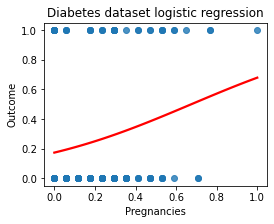

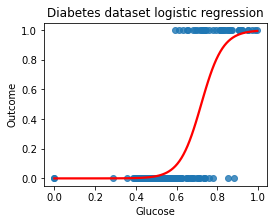

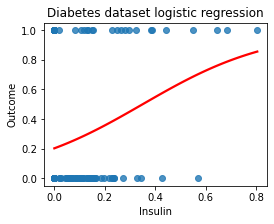

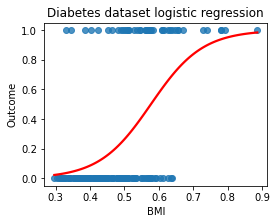

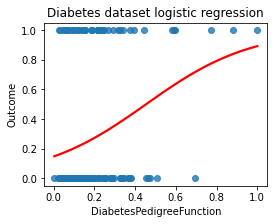

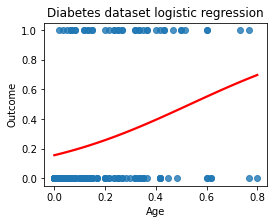

In [14]:
#visualising the graph of every variable against the outcome variable

for i in range(6):
    plt.figure(i, figsize=(4, 3))
    plt.title("Diabetes dataset logistic regression")
    plt.xlabel(labels[i])
    ax=sns.regplot(x=X_test[i], y=y_pred, data=diabetes_data, logistic=True,ci=None,line_kws={'color':'red'})
    ax.set(xlabel=labels[i],ylabel='Outcome')
    plt.show()

### 6. EVALUATING PERFORMANCE

In [15]:
#Look at the confusion matrix

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[90 10]
 [22 32]]


Text(0.5, 15.0, 'Predicted label')

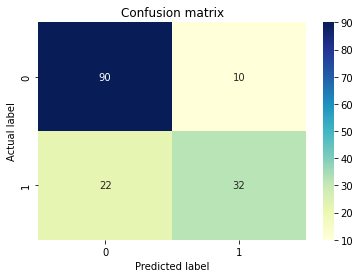

In [16]:
#visualising the confusion matrix by creatig a heatmap

# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [17]:
#Looking at the performance of the model

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7922077922077922
Precision: 0.7619047619047619
Recall: 0.5925925925925926
